In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Clean_Dataset.csv')

In [5]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [7]:
df.source_city.value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [8]:
df.destination_city.value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

### None of the data is missing from the csv file


<AxesSubplot: >

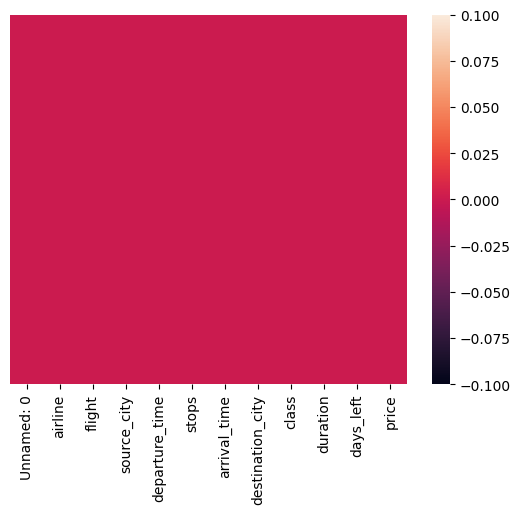

In [9]:
sns.heatmap(df.isnull(), yticklabels=False)

In [10]:
df.departure_time.value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [11]:
df.arrival_time.value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

In [12]:
df['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [13]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [14]:
# from the dataframe we are going to drop 'Unnamed:0' and 'flight' columns

# also we need to to encode airline, source-city,destination_city, 
#departure-time,arrival_time, stops, class

# Preprocessing the data

In [15]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('flight', axis = 1)

In [16]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [17]:
def fun_class(x):
    if x == 'zero':
        return 0
    elif x == 'one':
        return 1
    else:
        return 2

In [18]:
# df['stops'] = df['stops'].apply(fun_class)
df.stops = pd.factorize(df.stops)[0]

In [19]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [20]:
pd.get_dummies(df.airline, prefix = 'airline')

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
300148,0,0,0,0,0,1
300149,0,0,0,0,0,1
300150,0,0,0,0,0,1
300151,0,0,0,0,0,1


In [21]:
df = df.join(pd.get_dummies(df.airline, prefix = 'airline')).drop('airline', axis = 1)

In [22]:
df = df.join(pd.get_dummies(df.source_city, prefix = 'source')).drop('source_city', axis = 1)
df = df.join(pd.get_dummies(df.departure_time, prefix = 'departure')).drop('departure_time', axis = 1)

In [23]:
df = df.join(pd.get_dummies(df.arrival_time, prefix = 'arrival')).drop('arrival_time', axis = 1)
df = df.join(pd.get_dummies(df.destination_city, prefix = 'destination')).drop('destination_city', axis = 1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   stops                    300153 non-null  int64  
 1   class                    300153 non-null  int64  
 2   duration                 300153 non-null  float64
 3   days_left                300153 non-null  int64  
 4   price                    300153 non-null  int64  
 5   airline_AirAsia          300153 non-null  uint8  
 6   airline_Air_India        300153 non-null  uint8  
 7   airline_GO_FIRST         300153 non-null  uint8  
 8   airline_Indigo           300153 non-null  uint8  
 9   airline_SpiceJet         300153 non-null  uint8  
 10  airline_Vistara          300153 non-null  uint8  
 11  source_Bangalore         300153 non-null  uint8  
 12  source_Chennai           300153 non-null  uint8  
 13  source_Delhi             300153 non-null  uint8  
 14  sour

# Training Regression Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [26]:
X,y = df.drop('price', axis = 1), df.price

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [29]:
reg.score(X_test, y_test)

0.9853632907701273

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math

y_pred = reg.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

R2: 0.9853632907701273
MAE: 1063.7017257279506
MSE: 7528498.146028877


Text(0.5, 1.0, 'Prediction vs Actual Price')

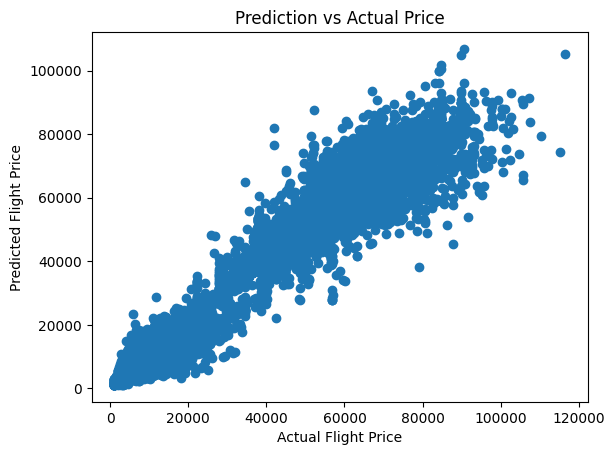

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')

In [32]:
y.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [33]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key = lambda x : x[1], reverse = True)
sorted_importances

[('class', 0.8798598414679265),
 ('duration', 0.057670567219034574),
 ('days_left', 0.0184661882285877),
 ('airline_Vistara', 0.005803328806751767),
 ('airline_Air_India', 0.004005190567057393),
 ('source_Delhi', 0.003722367575558901),
 ('destination_Delhi', 0.0035142678315107615),
 ('source_Mumbai', 0.002230484269694439),
 ('destination_Mumbai', 0.001956371546632028),
 ('source_Kolkata', 0.001818144345512264),
 ('stops', 0.0017828299057373166),
 ('destination_Kolkata', 0.001780316967168649),
 ('destination_Hyderabad', 0.001589292268587835),
 ('arrival_Evening', 0.0015725708381552662),
 ('source_Hyderabad', 0.0012356813806417267),
 ('arrival_Night', 0.0011434868844468257),
 ('destination_Bangalore', 0.001143159740250486),
 ('departure_Evening', 0.001081637073191448),
 ('source_Bangalore', 0.0010505058140113405),
 ('arrival_Afternoon', 0.0010207635417100226),
 ('source_Chennai', 0.0009481762191675282),
 ('destination_Chennai', 0.000909881122018554),
 ('departure_Morning', 0.000877193543

<BarContainer object of 5 artists>

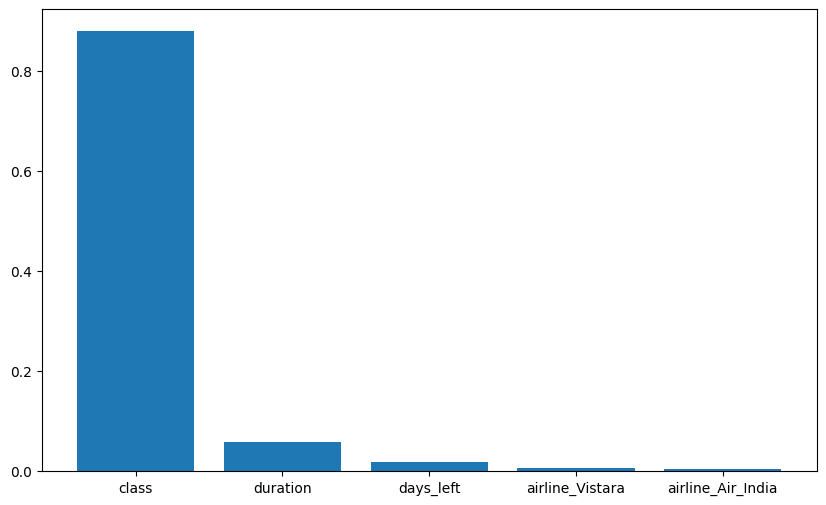

In [34]:
plt.figure(figsize = (10,6))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])

# Hyperparameter Tuning

In [35]:
# from sklearn.model_selection import GridSearchCV
# # Parameter1: A,B, C
# # Parameter2: X,Y,Z

# #All combination => AX, AY, AZ, BX, BY, BZ, CX, CY , CZ

# param_grid = {
#     'n_estimators' : [100,200,300],
#     'max_depth' : [None, 10, 20, 30],
#     'min_samples_split' : [2,5,10],
#     'min_samples_leaf' : [1,2,4],
#     'max_features': ['auto', 'sqrt']
# }

# grid_search = GridSearchCV(reg, param_grid, cv = 5)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators' : [100,200,300],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : randint(2,11),
    'min_samples_leaf' : randint(1,5),
    'max_features': [1.0,'auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs =-1)
random_search = RandomizedSearchCV(estimator = reg, param_distributions = param_dist, n_iter = 2, cv = 3,
                                  scoring = 'neg_mean_squared_error', verbose = 2, random_state = 10, n_jobs =-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", 

In [ ]:
y_pred = best_regressor.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))